# Recommender Systems part 1
    
* Welcome to my kernel, this is the first notebook for my final project series after finished 3 month Data Science class in Purwadhika Jakarta.
* I make it simple for presentation purpose

# What's the problem in real world today?

![too many choices](https://sitavriend.files.wordpress.com/2017/06/551615-supermarket.jpg)
*[Source](https://sitavriend.files.wordpress.com/2017/06/551615-supermarket.jpg)*

* Nowadays, people have **too many options** for selecting the items they actually want / need
* Try to calculate how much time & energy we've wasted just to find a video, online goods (e-commerce), jobs, even friends what you really want all by yourself?
* But if you have a friend who really **understands what you need**, also really **understands the product**, he / she can give excellent recommendation to you
* This makes your life easier right?

> ### We need a Recommendation System that can help us to find something what we really need

## Why Recommendation systems are important and valuable tools for business?

![Netflix](https://miro.medium.com/max/2000/1*dMR3xmufnmKiw4crlisQUA.png)

* 35 percent of what consumers purchase on Amazon
* 40 percent of app installs on Google Play
* 60 percent of what people watch on YouTube
* 75 percent of what they watch on Netflix
* Are come from their product recommendations systems!!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [18, 8]

# Study Case

## 1. Netflix

* Recommendations **increases** users engagement with the product and **decrease** subscription cancellations rates.
* This allows them to invest more money on new content **(rather than do advertising)**, which viewers will continue to view, giving them a good ROI.
* According to [their paper](https://dl.acm.org/doi/pdf/10.1145/2843948), this system saves the company around $1 billion each year.

## 2. Amazon

* At Amazon.com, we use recommendation algorithms to personalize the online store for each customer.
* The store radically changes based on customer interests.
* For example: showing programming titles to a software engineer and baby toys to a new mother

Recommendation engines play a role not only in helping customers find more of what they need, but these systems also improve cart value. If Amazon doesn’t have to pay much more for shipping to send you two or three times as many products, their profit margins improve.

# Types of Recommendation Engines:

## 1. Content-Based

![Content-based](https://miro.medium.com/max/1000/0*lhH61OnvbJFWrykk.png)
[Image Source - Analytics Vidhya in Medium](https://medium.com/analytics-vidhya/content-based-recommender-systems-in-python-2b330e01eb80)

The Content-Based Recommender relies on the similarity of the items being recommended. The basic idea is that if you like an item, then you will also like a “similar” item. It generally works well when it's easy to determine the context/properties of each item.


Content-Based method also solve **Cold Start problem**. If we're visiting an e-commerce / video platform for the first time, they won't know anything about us. So how can they give a great recommendation for us?

### Basic solution:

1. First, recommend the best selling products or some latest releases
1. After we see / click on some product, they will pick products with similar content to recommend us

# Load Dataset with reduce memory technique

* uint8	Unsigned integer (0 to 255)
* uint16	Unsigned integer (0 to 65535)
* uint32	Unsigned integer (0 to 4294967295)
* uint64	Unsigned integer (0 to 18446744073709551615)

> userId & movieId don't have a negative values, use uint (no negative value) can help us to reduce memory, since we use a large dataset

In [3]:
rating_df = pd.read_csv('/kaggle/input/movielens-20m-dataset/rating.csv', parse_dates=['timestamp'], dtype={'userId': 'uint32', 'movieId': 'uint32', 'rating': 'float32'})
movie_df = pd.read_csv('/kaggle/input/movielens-20m-dataset/movie.csv', dtype={'movieId': 'uint32'})

rating_df.shape, movie_df.shape

((20000263, 4), (27278, 3))

# Data Cleaning
    
* Both datasets don't have missing or duplicated values
* Add new features using datetime for analysist & EDA

In [4]:
rating_df['gave_rating_year'] = rating_df['timestamp'].dt.year
rating_df['gave_rating_month'] = rating_df['timestamp'].dt.month_name().str[:3]

rating_df.drop('timestamp', axis=1, inplace=True)

In [5]:
rating_df['sentiment_analysis'] = rating_df['rating'].map({
    0.5: 'Negative', 1.0: 'Negative', 1.5: 'Negative', 2.0: 'Negative', 2.5: 'Negative',
    3.0: 'Neutral', 3.5: 'Neutral',
    4.0: 'Positive', 4.5: 'Positive', 5.0: 'Positive'
})

In [6]:
rating_df.head(3)

,userId,movieId,rating,gave_rating_year,gave_rating_month,sentiment_analysis
0,1,2,3.5,2005,Apr,Neutral
1,1,29,3.5,2005,Apr,Neutral
2,1,32,3.5,2005,Apr,Neutral


In [7]:
movie_df.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


# Merge

In [8]:
final_df = pd.merge(rating_df, movie_df, on='movieId', how='inner')  # by default ‘inner’

final_df.shape

(20000263, 8)

In [9]:
final_df.head()

,userId,movieId,rating,gave_rating_year,gave_rating_month,sentiment_analysis,title,genres
0,1,2,3.5,2005,Apr,Neutral,Jumanji (1995),Adventure|Children|Fantasy
1,5,2,3.0,1996,Dec,Neutral,Jumanji (1995),Adventure|Children|Fantasy
2,13,2,3.0,1996,Nov,Neutral,Jumanji (1995),Adventure|Children|Fantasy
3,29,2,3.0,1996,Jun,Neutral,Jumanji (1995),Adventure|Children|Fantasy
4,34,2,3.0,1996,Oct,Neutral,Jumanji (1995),Adventure|Children|Fantasy


# Visualization

In [10]:
movie_genres = []

for genre in movie_df['genres']:
    for movie in genre.split('|'):
        movie_genres.append(movie)

In [11]:
genre_counts = pd.Series(movie_genres).value_counts()[:18]

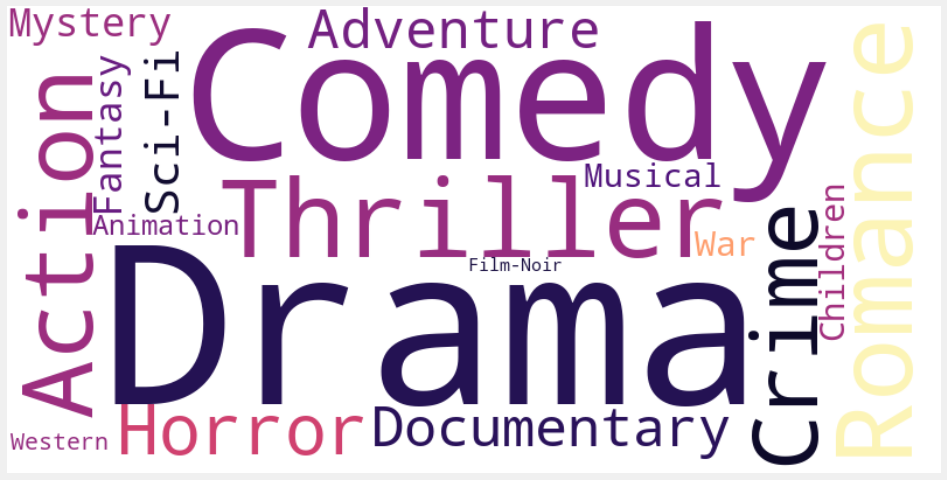

In [12]:
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='magma')
genres_cloud.generate_from_frequencies(genre_counts)

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

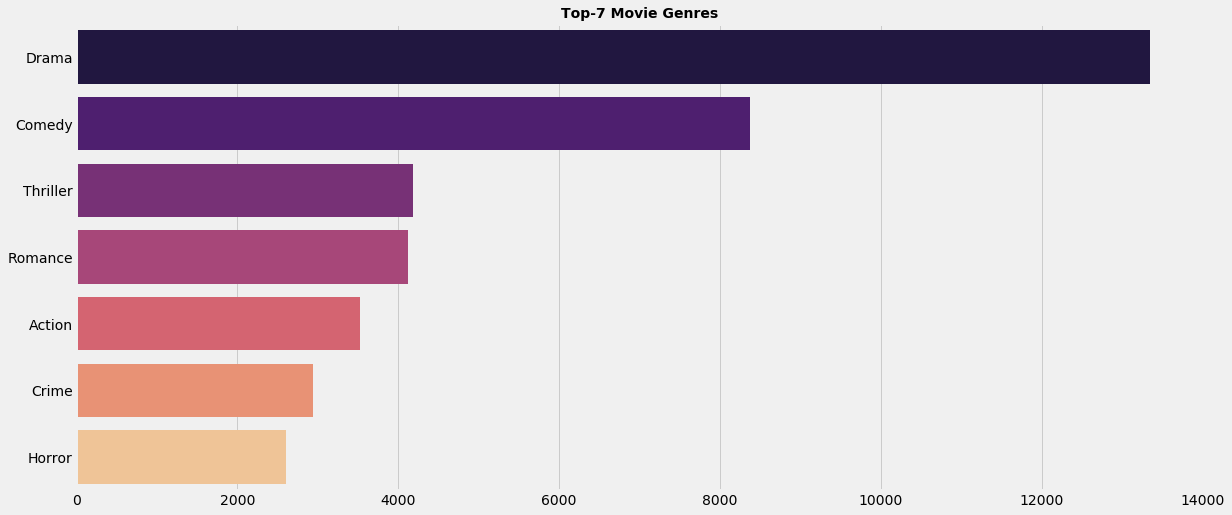

In [13]:
top_7_genres = pd.Series(movie_genres).value_counts()[:7]

sns.barplot(y=top_7_genres.index, x=top_7_genres.values, palette='magma').set_title(
        'Top-7 Movie Genres', fontsize=14, weight='bold')

plt.show()

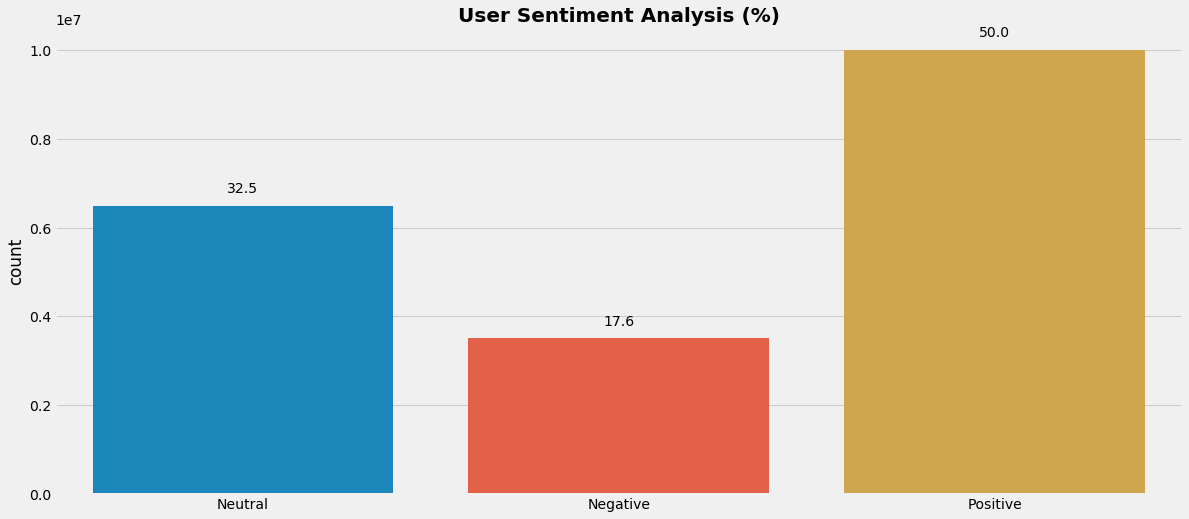

In [14]:
splot1 = sns.countplot(final_df['sentiment_analysis'])

for p in splot1.patches:
                splot1.annotate(format(p.get_height() / final_df['rating'].shape[0] * 100, '.1f'),
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                               rotation=0, ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')
        
plt.xlabel(None)
plt.title('User Sentiment Analysis (%)', fontsize=20, weight='bold')
plt.show()

### From total 138493 users
* 50% users gave positive rating
* 32.5% users are neutral 
* 17.6% users gave negative rating

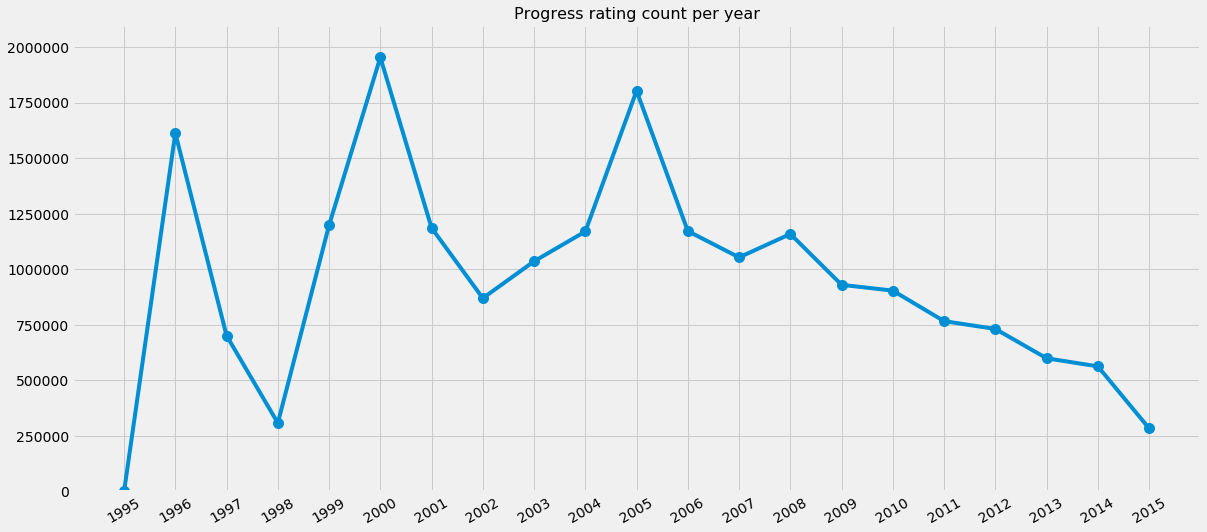

In [15]:
def plot_progress_year(feature, title):
    rating_progress = final_df.groupby(feature)['userId'].count()
    
    plt.plot(rating_progress, linestyle='-', marker='o', markersize=10)
    plt.title(title, fontsize=16)
    plt.xticks([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], rotation=30)
    plt.ylim([0, 2100000])
    plt.show()

plot_progress_year('gave_rating_year', 'Progress rating count per year')

* If you like old movies, maybe this dataset can give good recommendation for you.
* But this might not be suitable for those of you who like new movies

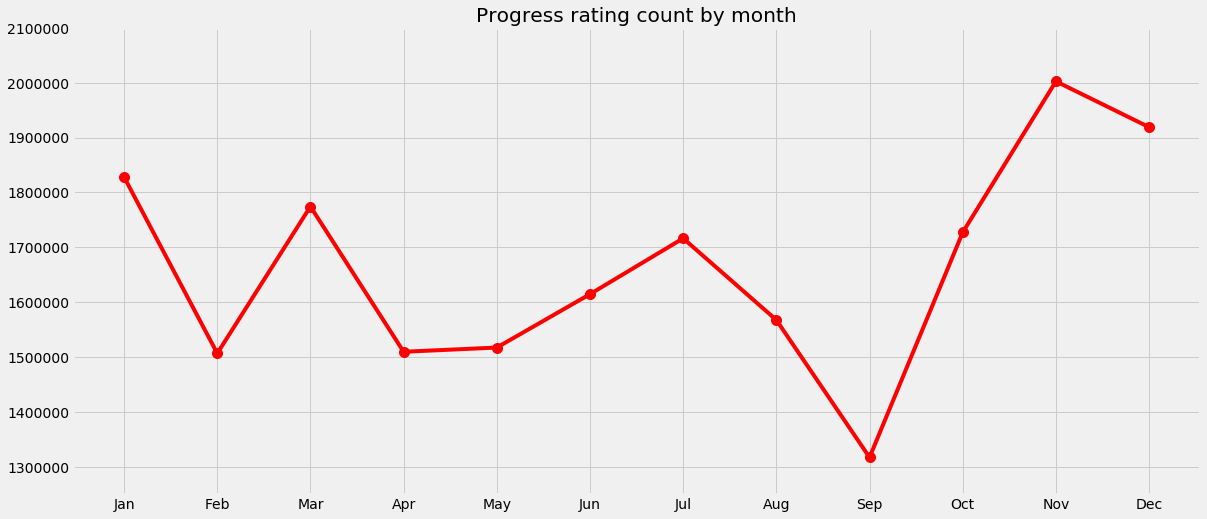

In [16]:
df_index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_progress = final_df.groupby('gave_rating_month').userId.count().reindex(df_index)

plt.plot(month_progress, linestyle='-', color='red', marker='o', markersize=10)
plt.title('Progress rating count by month')
plt.ylim([1250000, 2100000])
plt.show()

* Many people watch movies at near the end of the year
* Perhaps because they get a holiday, or a lot of good movies come out at that time

# Machine Learning model (TF-IDF vectorizer + Cosine Similarity)

## TF-IDF

![tfidf](https://miro.medium.com/max/1200/1*V9ac4hLVyms79jl65Ym_Bw.jpeg)
source: [medium](https://medium.com/@ted_mei/demystify-tf-idf-in-indexing-and-ranking-5c3ae88c3fa0)

* TF is simply the frequency of a word in a document
* IDF is the inverse of the document frequency among the whole corpus of documents

Example: Suppose we search for “the results of latest European Socccer games” on Google. It is certain that “the” will occur more frequently than “soccer games” but the relative importance of **soccer games** is higher than **the** search query point of view

> ### In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

In [17]:
genres_str = movie_df['genres'].str.split('|').astype(str)

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0)
tfidf_matrix = tfidf.fit_transform(genres_str)

tfidf_matrix.shape  # banyak karena n-gram (1,2)
# tfidf.get_feature_names()

(27278, 191)

## Cosine-Similarity

* Cosine similarity takes the angle between two non-zero vectors and calculates the cosine of that angle, and this value is known as the similarity between the two vectors
* This similarity score ranges from 0 to 1, with 0 being the lowest (the least similar) and 1 being the highest (the most similar).
* If the angle between two vectors is 0°, then the similarity would be 1. Conversely, if the angle between two vectors is 90°, then the similarity would be 0. For two vectors with an angle greater than 90°, then we also consider those to be 0.

![cosine](https://www.machinelearningplus.com/wp-content/uploads/2018/10/3d_projection-865x922.png)
source: [machinelearningplus](https://www.machinelearningplus.com/nlp/cosine-similarity/)

> ### The smaller the angle, higher the cosine similarity

1. As you can see, **Doc Dhoni_Small** and the main **Doc Dhoni** are oriented closer together in 3-D space, even though they are far apart by magnitiude.
1. It’s important to note that only the angle between the two vectors is considered, and not the magnitude of the vectors.

In [19]:
# Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.3170459 , 0.06282188, 0.05665841],
       [0.3170459 , 1.        , 0.        , 0.        ],
       [0.06282188, 0.        , 1.        , 0.35995626],
       [0.05665841, 0.        , 0.35995626, 1.        ]])

* Now we have a pairwise cosine similarity matrix for all the movies in the dataset.
* The next step is to write a function that returns the 10 most similar movies based on the cosine similarity score.

In [20]:
indices = pd.Series(movie_df.index, index=movie_df['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title, similarity=False):
    
    if similarity == False:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11] # you can change to 20 movies, even more
    
        movie_indices = [i[0] for i in sim_scores]
    
        return pd.DataFrame({'Movie': movie_df['title'].iloc[movie_indices].values})
    
    
    elif similarity == True:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        
        movie_indices = [i[0] for i in sim_scores]
        similarity_ = [i[1] for i in sim_scores]
        
        return pd.DataFrame({'Movie': movie_df['title'].iloc[movie_indices].values,
                             'Similarity': similarity_})

# Make a Movie Recommendation
* With 3 different solutions

In [21]:
genre_recommendations('Kung Fu Panda (2008)', similarity=True)

,Movie,Similarity
0,Happy Feet Two (2011),0.891188
1,Despicable Me 2 (2013),0.891188
2,Open Season (2006),0.813233
3,Happy Feet (2006),0.813233
4,Cars 2 (2011),0.813233
5,Madagascar 3: Europe's Most Wanted (2012),0.813233
6,Madagascar: Escape 2 Africa (2008),0.805306
7,Kung Fu Panda 2 (2011),0.805306
8,"Powerpuff Girls, The (2002)",0.749642
9,Kung Fu Panda: Secrets of the Furious Five (2008),0.749642


In [22]:
genre_recommendations("Indiana Jones and the Temple of Doom (1984)", similarity=True)

,Movie,Similarity
0,Street Fighter (1994),1.0
1,Dragonheart (1996),1.0
2,Highlander (1986),1.0
3,Conan the Barbarian (1982),1.0
4,Mortal Kombat: Annihilation (1997),1.0
5,Indiana Jones and the Temple of Doom (1984),1.0
6,Willow (1988),1.0
7,Red Sonja (1985),1.0
8,"13th Warrior, The (1999)",1.0
9,"7th Voyage of Sinbad, The (1958)",1.0


### Problem in this recommendation:
* This system only recommend similar movie
* But remember, a few years can make a big difference in quality, especially in sci-fi or animation movies
* Maybe some user can think this is a bad recommendation system, because give them an old movies recommendation

> ### Perhaps you like old movies like me, but some people doesn't like old movies, so it's depends on your users

In [23]:
movie_df['movie_release_year'] = movie_df['title'].str.extract(r'(?:\((\d{4})\))?\s*$', expand=False)

In [24]:
## option 2

def genre_recommendations_2(title, most_recent=False):
    
    if most_recent == False:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:10] # you can change to 20 movies, even more
    
        movie_indices = [i[0] for i in sim_scores]
    
        return pd.DataFrame({'Movie': movie_df['title'].iloc[movie_indices].values})
    
    
    elif most_recent == True:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:14]
        
        movie_indices = [i[0] for i in sim_scores]
        
        most_recent_movie = pd.DataFrame({'Movie': movie_df['title'].iloc[movie_indices].values,
                                          'release_year': movie_df['movie_release_year'].iloc[movie_indices].values})
        
        return most_recent_movie.sort_values('release_year', ascending=False).head(10)

* We can sort by movie_release_year to give a better recommendation
* Even system still recommend this old movies, but we can put it behind a new movie
* In top-n recommender (only recommend 5 - 10 items per row), users only see newest movie 

In [25]:
genre_recommendations_2('Green Hornet, The (2011)', most_recent=True)

,Movie,release_year
4,Sucker Punch (2011),2011
7,"Leslie, My Name is Evil (Manson, My Name is Ev...",2009
8,"Spirit, The (2008)",2008
12,Hancock (2008),2008
5,Harry Potter and the Goblet of Fire (2005),2005
2,"Medallion, The (2003)",2003
0,Monday (2000),2000
1,"Mask, The (1994)",1994
3,"Crow, The (1994)",1994
6,Switch (1991),1991


### Another options:

* Sort by rating mean to recommend movies with a high rating
* Sort by total rating

In [26]:
rating_mean = final_df.groupby('title')['rating'].mean().reset_index()
total_rating = final_df.groupby('title')['rating'].count().reset_index()

total_rating_mean = pd.merge(rating_mean, total_rating, on='title', how='inner')
total_rating_mean.rename(columns={'rating_x': 'rating_mean',
                                  'rating_y': 'total_rating'},
                                  inplace=True)

final_df2 = movie_df.merge(total_rating_mean, on='title', how='left').dropna()

In [27]:
## option 3

def genre_recommendations_3(title, best_rating=False):
    
    if best_rating == False:  # sort by total rating
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:14]
    
        movie_indices = [i[0] for i in sim_scores]
        
        most_rating_movie = pd.DataFrame({'Movie': final_df2['title'].iloc[movie_indices].values,
                                          'total_rating': final_df2['total_rating'].iloc[movie_indices].values})
    
        return most_rating_movie.sort_values('total_rating', ascending=False).head(10)
    
    
    elif best_rating == True:  # sort by best rating
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:14]
        
        movie_indices = [i[0] for i in sim_scores]
        
        most_recent_movie = pd.DataFrame({'Movie': final_df2['title'].iloc[movie_indices].values,
                                          'rating_mean': final_df2['rating_mean'].iloc[movie_indices].values})
        
        return most_recent_movie.sort_values('rating_mean', ascending=False).head(10)

In [28]:
genre_recommendations_3('Taken (2008)', best_rating=True)

,Movie,rating_mean
8,Fight Club (1999),4.227123
3,"Killer, The (Die xue shuang xiong) (1989)",4.066749
0,Léon: The Professional (a.k.a. The Professiona...,4.050573
9,Hard-Boiled (Lat sau san taam) (1992),3.977894
10,"Boondock Saints, The (2000)",3.947365
1,Clear and Present Danger (1994),3.660309
11,Magnum Force (1973),3.589674
4,Face/Off (1997),3.331744
5,Cop Land (1997),3.287867
12,Shaft (1971),3.278870


In [29]:
genre_recommendations_3('Taken (2008)', best_rating=False)

,Movie,total_rating
8,Fight Club (1999),40106.0
1,Clear and Present Danger (1994),29571.0
0,Léon: The Professional (a.k.a. The Professiona...,25804.0
4,Face/Off (1997),18460.0
10,"Boondock Saints, The (2000)",8027.0
7,Double Jeopardy (1999),7448.0
5,Cop Land (1997),5044.0
2,Last Man Standing (1996),3276.0
3,"Killer, The (Die xue shuang xiong) (1989)",2839.0
9,Hard-Boiled (Lat sau san taam) (1992),2782.0


### Overall, here are the pros of using content-based recommendation:

1. No need for data on other users, thus no cold-start or sparsity problems.
1. Can recommend to users with unique tastes.
1. Can recommend new & unpopular items.
1. Can provide explanations for recommended items by listing content-features that caused an item to be recommended (in this case, movie genres)

### However, there are some cons of using this approach:

1. Finding the appropriate features is hard.
1. Does not recommend items outside a user's content profile.
1. Unable to exploit quality judgments of other users.

> ### The problem of this method: it will always be limited to the same type of movie the user see in the past

# Reference
    
* [James Le, "The 4 Recommendation Engines That Can Predict Your Movie Tastes"](https://medium.com/@james_aka_yale/the-4-recommendation-engines-that-can-predict-your-movie-tastes-bbec857b8223)
* [Corinna Underwood, "Use Cases of Recommendation Systems in Business"](https://emerj.com/ai-sector-overviews/use-cases-recommendation-systems/)